# Dogs vs. Cats

# Create an algorithm to distinguish dogs from cats

## Code source : https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

## Image Source: https://www.tensorflow.org/datasets/catalog/cats_vs_dogs 

In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [2]:
img_width = 150
img_height = 150

train_data_dir = 'image_data/training'
validation_data_dir = 'image_data/validation'
train_samples = 120
validation_samples = 30
epochs = 50
batch_size = 20

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
model = Sequential()

# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [4]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [5]:
# Data Augmentation is a method of artificially creating a new dataset for training from 
# the existing training dataset to improve the performance of deep learning neural network 
# with the amount of data available. It is a form of regularization which makes our model generalize better 
# than before.

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [6]:
# This is the augmentation configuration we will use for testing:
# only rescaling, avoiding having same training and validation data.
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 198 images belonging to 2 classes.


In [8]:
print(train_generator.class_indices)

{'Cat': 0, 'Dog': 1}


In [9]:
imgs, labels = next(train_generator)

In [10]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
0.0


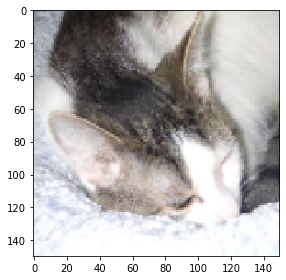

1.0


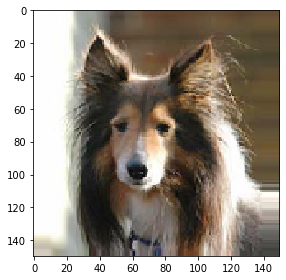

1.0


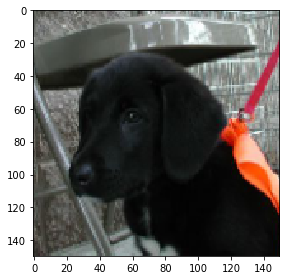

0.0


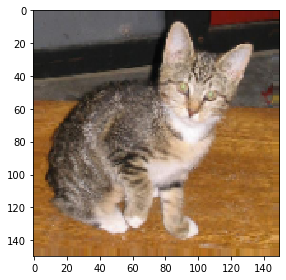

0.0


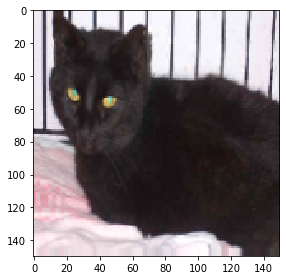

1.0


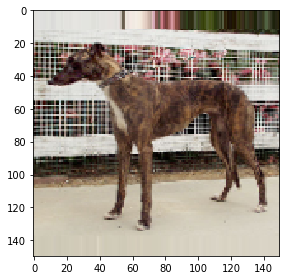

0.0


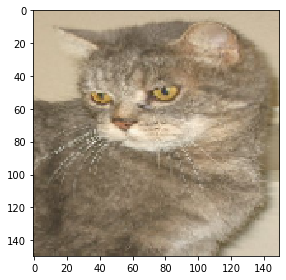

0.0


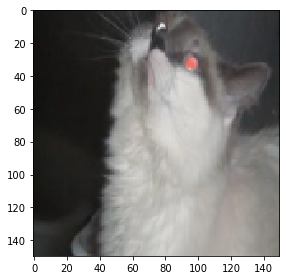

0.0


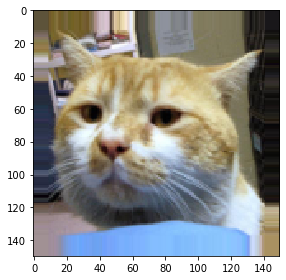

0.0


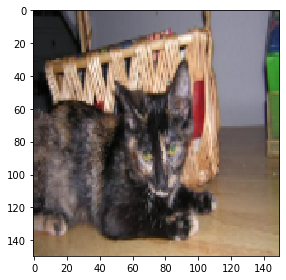

1.0


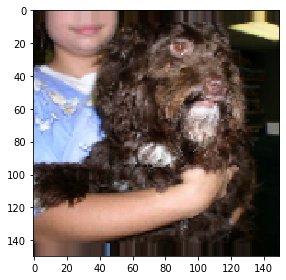

1.0


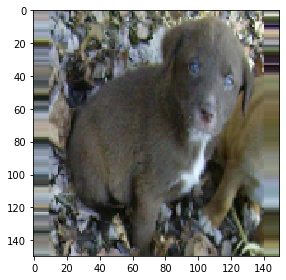

0.0


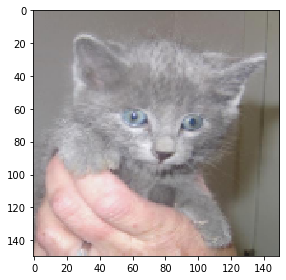

1.0


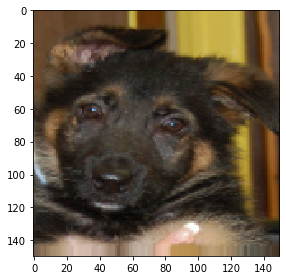

0.0


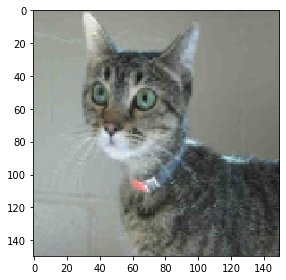

0.0


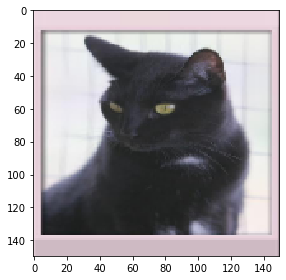

1.0


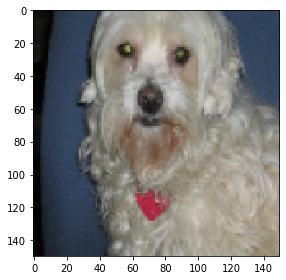

0.0


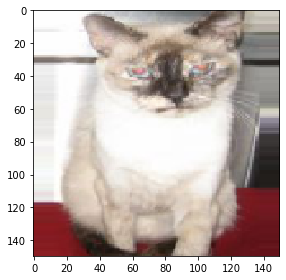

1.0


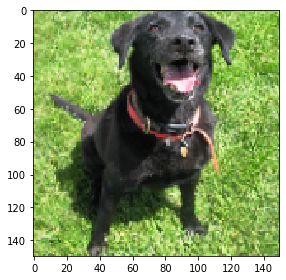

1.0


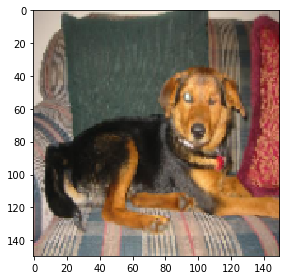

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [12]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 100 images belonging to 2 classes.


In [13]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

C:\Users\LENOVO\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
6/6 [==============================] - 9s 1s/step - loss: 0.6989 - accuracy: 0.4794 - val_loss: 0.7009 - val_accuracy: 0.4000
Epoch 2/50
6/6 [==============================] - 3s 558ms/step - loss: 0.6934 - accuracy: 0.5270 - val_loss: 0.6823 - val_accuracy: 0.5500
Epoch 3/50
6/6 [==============================] - 3s 447ms/step - loss: 0.6867 - accuracy: 0.5639 - val_loss: 0.6586 - val_accuracy: 0.6500
Epoch 4/50
6/6 [==============================] - 2s 398ms/step - loss: 0.6919 - accuracy: 0.5291 - val_loss: 0.6773 - val_accuracy: 0.5500
Epoch 5/50
6/6 [==============================] - 2s 361ms/step - loss: 0.6953 - accuracy: 0.5061 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 6/50
6/6 [==============================] - 3s 436ms/step - loss: 0.6950 - accuracy: 0.4496 - val_loss: 0.6826 - val_accuracy: 0.8000
Epoch 7/50
6/6 [==============================] - 2s 410ms/step - loss: 0.6873 - accuracy: 0.5698 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 8/50
6/6 [=======

In [14]:
## Now Predict
predict_dir_path='image_data/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['234.jpg', '236.jpg', '2512.jpg', '2658.jpg', '2994.jpg', '310.jpg', '3111.jpg', '3285.jpg']


In [15]:
# predicting images
from keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

C:\Users\LENOVO\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


234.jpg: cat
236.jpg: cat
2512.jpg: cat
2658.jpg: cat
2994.jpg: dog
310.jpg: dog
3111.jpg: dog
3285.jpg: dog
Total Dogs : 4
Total Cats : 4
